### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [35]:
class styles:
    BOLD = '\033[1m'
    END = '\033[0m'

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [36]:
data = pd.read_csv('data/coupons.csv')

In [37]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [38]:
# 2.1 Count of dataset rows and columns 
print(f"{styles.BOLD}TOTAL NUMBER OF ROWS AND COLUMNS{styles.END}")
print(f"Rows: {data.shape[0]}")
print(f"Columns: {data.shape[1]}")

TOTAL NUMBER OF ROWS AND COLUMNS
Rows: 12684
Columns: 26


In [39]:
# 2.2 Dataset Info
print(f"{styles.BOLD}DATASET INFO{styles.END}")
print(data.info())

DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   1

In [40]:
# 2.3 Missing data
print(f"{styles.BOLD}MISSING DATA{styles.END}")
missing_data = data.isnull().sum()
missing_percnt = (missing_data / len(data) * 100).round(2)
missing_df = pd.DataFrame({'Missing': missing_data, 'Percent': missing_percnt})
print(missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False))


MISSING DATA
                      Missing  Percent
car                     12576    99.15
CoffeeHouse               217     1.71
Restaurant20To50          189     1.49
CarryAway                 151     1.19
RestaurantLessThan20      130     1.02
Bar                       107     0.84


In [41]:
# 2.4 Now findout how many duplocates are there.
print(f"{styles.BOLD}DUPLICATE DATA{styles.END}")
print(f"Duplicate rows: {data.duplicated().sum()}")

DUPLICATE DATA
Duplicate rows: 74


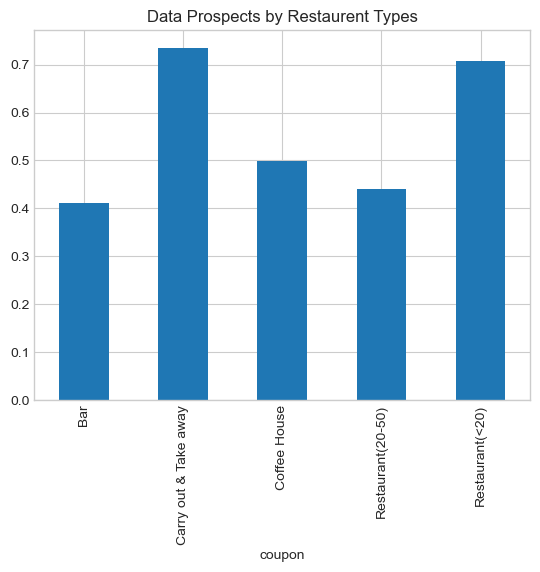

In [42]:
# 2.5 Plot for Coupons by Type

data.groupby('coupon')['Y'].mean().plot(kind='bar',title='Data Prospects by Restaurent Types')
plt.show()

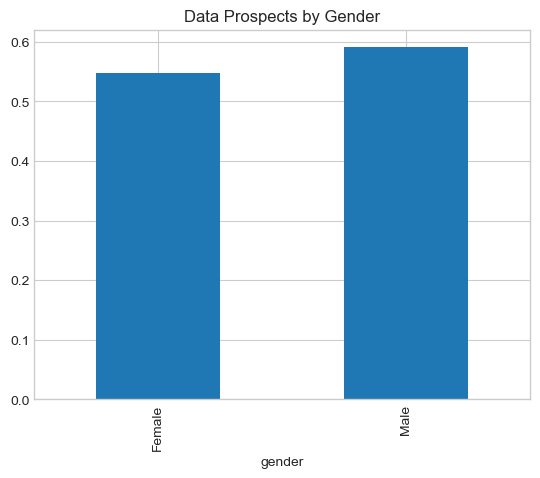

In [43]:
# 2.6 Plot by gender who accepts more coupons

plot_by_gender = data.groupby('gender')['Y'].mean().plot(kind='bar', title='Data Prospects by Gender')
plt.show()

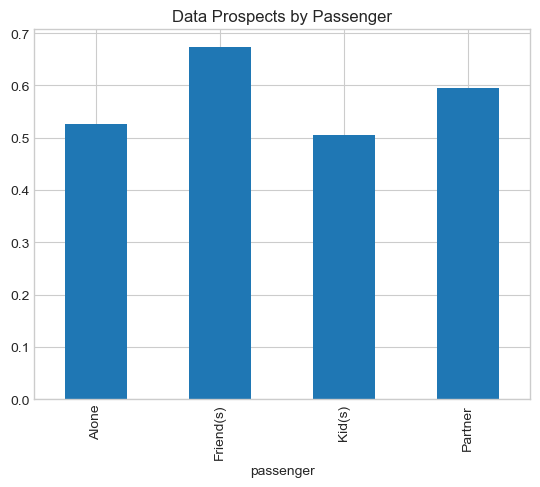

In [44]:
# 2.7 Plot by passenger with driver - PASSENGER is missspelled here so lets rename the column.

data = data.rename(columns={'passanger': 'passenger'})

plot_by_passenger = data.groupby('passenger')['Y'].mean().plot(kind='bar', title='Data Prospects by Passenger')

3. Decide what to do about your missing data -- drop, replace, other...

In [45]:
# 3.1 Look at the 'car' column where we see above it has many null values.
print(f"{styles.BOLD}CAR CLOUMN Non-null Entries{styles.END}")
print(f"\nNon-null entries: {data['car'].notna().sum()} out of {len(data)}")

CAR CLOUMN Non-null Entries

Non-null entries: 108 out of 12684


In [46]:
# 3.2 Drop the 'car' column since it has almost null values.
print(f"{styles.BOLD}DROPPED CAR CLOUMN{styles.END}")
print(f"Before Dropping 'Car' Column, dataset shape: {data.shape}")
data = data.drop(columns=['car'])
print(f"After Dropping 'Car' Column, dataset shape: {data.shape}")

DROPPED CAR CLOUMN
Before Dropping 'Car' Column, dataset shape: (12684, 26)
After Dropping 'Car' Column, dataset shape: (12684, 25)


In [47]:
# 3.3 Check missing values in the rows
print(f"{styles.BOLD}MISSING VALUES IN THE ROWS{styles.END}")
missing_values_in_rows = data.isnull().any(axis=1).sum()
print(f"Rows with missing values: {missing_values_in_rows}")
print(f"Percentage: {(missing_values_in_rows / len(data) * 100):.2f}%")

MISSING VALUES IN THE ROWS
Rows with missing values: 605
Percentage: 4.77%


In [48]:
# 3.4 Dropping rows for missing values
print(f"{styles.BOLD}DROPPING ROWS FOR MISSING VALUES{styles.END}")
data_clean_df = data.dropna()
print(f"ROWS in the Original Dataset: {len(data)}")
print(f"ROWS in the Cleaned Dataset: {len(data_clean_df)}")
print(f"Total Rows dropped: {len(data) - len(data_clean_df)}")

DROPPING ROWS FOR MISSING VALUES
ROWS in the Original Dataset: 12684
ROWS in the Cleaned Dataset: 12079
Total Rows dropped: 605


In [49]:
# 3.5 See if there are any more values missing.
print(f"Missing data in the cleaned data: {data_clean_df.isnull().sum().sum()}")

Missing data in the cleaned data: 0


4. What proportion of the total observations chose to accept the coupon?



In [50]:
# 4.1 proportion and percentage accepted

print(f"{styles.BOLD}Proportion Accepted{styles.END}")
portion = (data_clean_df['Y'] == 1).mean()
print(f"{portion:.4f}")

print(f"{styles.BOLD}Percentage Accepted{styles.END}")
percentage = (data_clean_df['Y'] == 1).mean() * 100
print(f"{percentage:.2f}%")

Proportion Accepted
0.5693
Percentage Accepted
56.93%


5. Use a bar plot to visualize the `coupon` column.

<Figure size 900x600 with 0 Axes>

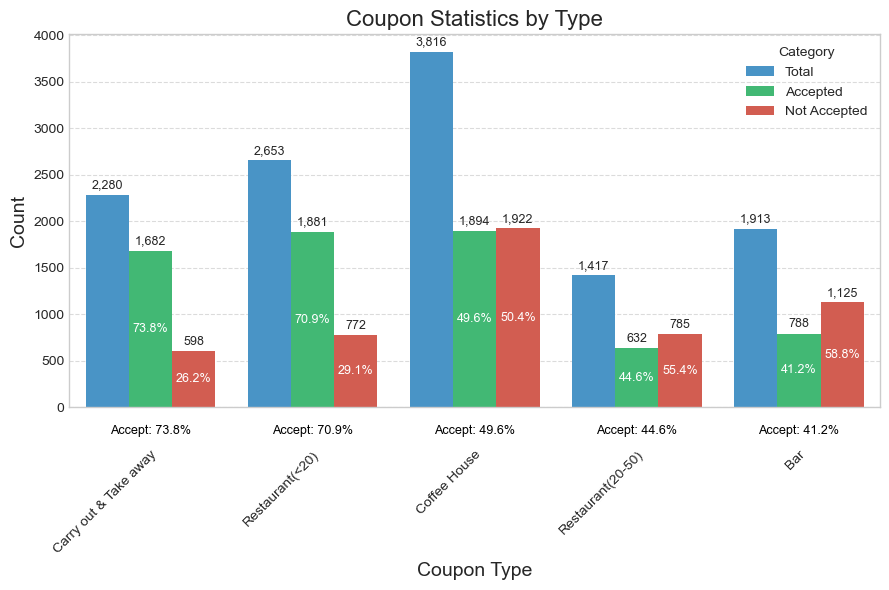

In [51]:
# 5.1 Creates a grouped bar chart showing the count of total, accepted, and not accepted coupons by coupon type.
from typing import Union, Optional, List, Dict

def plot_coupon_statistics_by_type(
    data: pd.DataFrame, 
    acceptance_column: str = 'Y',
    coupon_type_column: str = 'coupon',
    title: str = 'Coupon Statistics by Type',
    figsize: tuple = (9, 6),
    colors: Optional[list] = None,
    sort_by: str = 'total',  # Options: 'total', 'accepted', 'not_accepted', 'acceptance_rate', 'alphabetical'
    x_label_rotation: int = 45,
    x_label_padding: float = 30.0,
    bottom_margin: float = 0.25  # Increased bottom margin for x-axis labels
) -> None:
    """
    Args:
        data (pd.DataFrame): DataFrame containing the coupon acceptance data
        acceptance_column (str): Name of the column containing acceptance values (0/1 or True/False)
        coupon_type_column (str): Name of the column containing coupon type information
        title (str): Title for the plot
        figsize (tuple): Figure size as (width, height) in inches
        colors (list, optional): List of three colors for total, accepted and not accepted bars
        sort_by (str): How to sort the coupon types ('total', 'accepted', 'not_accepted', 
                       'acceptance_rate', or 'alphabetical')
        x_label_rotation (int): Rotation angle for x-axis labels in degrees
        x_label_padding (float): Padding between x-axis labels and axis
        bottom_margin (float): Bottom margin of the plot to accommodate labels
    
    Returns:
        None: Displays the plot
    """
    # Set default colors if not provided
    if colors is None:
        colors = ['#3498db', '#2ecc71', '#e74c3c']  # Blue for total, green for accepted, red for not accepted
    
    # Handle different data types in acceptance column
    if data[acceptance_column].dtype == bool:
        accepted_mask = data[acceptance_column]
    else:
        # Assuming 1 means accepted and 0 means not accepted
        accepted_mask = (data[acceptance_column] == 1)
    
    # Group by coupon type and calculate statistics
    stats = {}
    for coupon_type in data[coupon_type_column].unique():
        type_data = data[data[coupon_type_column] == coupon_type]
        total = len(type_data)
        accepted = accepted_mask[data[coupon_type_column] == coupon_type].sum()
        not_accepted = total - accepted
        acceptance_rate = accepted / total if total > 0 else 0
        
        stats[coupon_type] = {
            'Total': total,
            'Accepted': accepted,
            'Not Accepted': not_accepted,
            'Acceptance Rate': acceptance_rate
        }
    
    # Convert to DataFrame for easier plotting
    stats_df = pd.DataFrame(stats).T.reset_index()
    stats_df = stats_df.rename(columns={'index': 'Coupon Type'})
    
    # Sort the DataFrame based on the specified criterion
    if sort_by == 'total':
        stats_df = stats_df.sort_values('Total', ascending=False)
    elif sort_by == 'accepted':
        stats_df = stats_df.sort_values('Accepted', ascending=False)
    elif sort_by == 'not_accepted':
        stats_df = stats_df.sort_values('Not Accepted', ascending=False)
    elif sort_by == 'acceptance_rate':
        stats_df = stats_df.sort_values('Acceptance Rate', ascending=False)
    elif sort_by == 'alphabetical':
        stats_df = stats_df.sort_values('Coupon Type')
    
    # Reshape for seaborn
    plot_data = pd.melt(
        stats_df, 
        id_vars=['Coupon Type', 'Acceptance Rate'],
        value_vars=['Total', 'Accepted', 'Not Accepted'],
        var_name='Category', 
        value_name='Count'
    )
    
    # Create the plot with adjusted figure size
    plt.figure(figsize=figsize)
    
    # Create the plot with more space at the bottom
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create the bar plot
    sns.barplot(
        x='Coupon Type', 
        y='Count', 
        hue='Category', 
        data=plot_data,
        palette=colors,
        ax=ax
    )
    
    # Add labels and title
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Coupon Type', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    
    # Rotate x-axis labels and add padding
    plt.setp(ax.get_xticklabels(), rotation=x_label_rotation, ha='right', rotation_mode='anchor')
    
    # Increase padding between labels and axis
    ax.tick_params(axis='x', which='major', pad=x_label_padding)
    
    # Add count and percentage labels
    for i, bar in enumerate(ax.patches):
        height = bar.get_height()
        if height > 0:  # Only add text if the bar has height
            # Calculate the position
            x_pos = bar.get_x() + bar.get_width() / 2
            y_pos = height + max(plot_data['Count']) * 0.01
            
            # Add count label
            ax.text(x_pos, y_pos, f'{int(height):,}', ha='center', va='bottom', fontsize=9)
            
            # Add percentage for Accepted and Not Accepted bars
            category = plot_data.iloc[i % len(plot_data)]['Category']
            if category in ['Accepted', 'Not Accepted']:
                coupon_type = plot_data.iloc[i % len(plot_data)]['Coupon Type']
                total = stats_df[stats_df['Coupon Type'] == coupon_type]['Total'].values[0]
                percentage = height / total * 100 if total > 0 else 0
                
                # Only add percentage if there's enough space
                if height > max(plot_data['Count']) * 0.05:
                    ax.text(x_pos, height / 2, f'{percentage:.1f}%', 
                            ha='center', va='center', color='white', fontsize=9)
    
    # Add acceptance rate as text below each coupon type
    for i, coupon_type in enumerate(stats_df['Coupon Type']):
        acceptance_rate = stats_df[stats_df['Coupon Type'] == coupon_type]['Acceptance Rate'].values[0] * 100
        ax.text(i, -max(plot_data['Count']) * 0.05, f'Accept: {acceptance_rate:.1f}%', 
                ha='center', va='top', fontsize=9, color='black')
    
    # Add grid lines for better readability
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    
    # Adjust bottom margin to make room for x-axis labels
    plt.subplots_adjust(bottom=bottom_margin)
    
    # Add legend with a better position
    ax.legend(title='Category', loc='upper right')
    
    # Ensure the plot is properly displayed
    plt.tight_layout()
    plt.show()

# Draw a plot for df = data_clean_df
plot_coupon_statistics_by_type(
    data_clean_df, 
    acceptance_column='Y', 
    coupon_type_column='coupon',
    sort_by='acceptance_rate')

6. Use a histogram to visualize the temperature column.

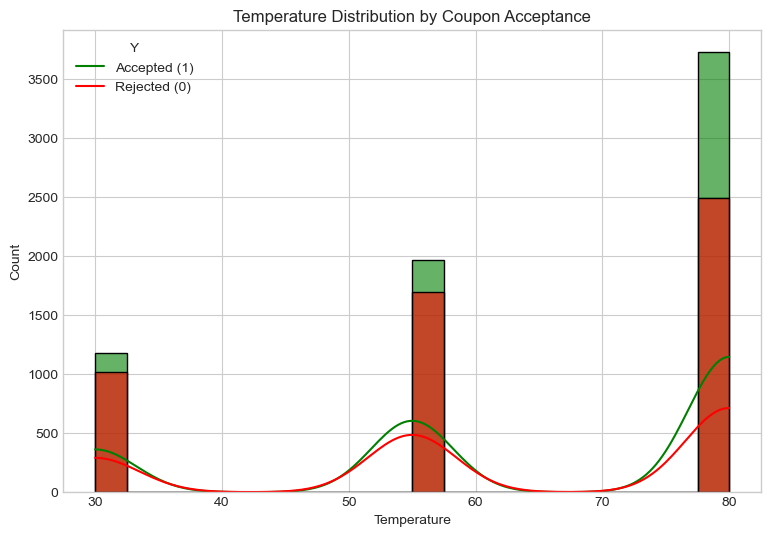

STATISTICS BY TEMPERATURE
Mean: 63.33°F
Median: 80.00°F
Std Dev: 19.13°F
Min: 30°F
Max: 80°F

Counts by Temprature
temperature
30    2195
55    3662
80    6222
Name: count, dtype: int64


In [52]:
# 6.1 Create figure and subplots
fig, ax1 = plt.subplots(figsize=(9,6))

# Split data by acceptance
accepted_data = data_clean_df[data_clean_df['Y'] == 1]
not_accepted_data = data_clean_df[data_clean_df['Y'] == 0]
    

# Plot the histograms on the main subplot
sns.histplot(
        data=accepted_data, 
        x='temperature', 
        bins=20, 
        color='Green',  # Green for accepted
        alpha=0.6,
        kde=True,
        label='Accepted',
        ax=ax1
    )
    
sns.histplot(
        data=not_accepted_data, 
        x='temperature', 
        bins=20, 
        color='Red',  # Red for rejected
        alpha=0.6,
        kde=True,
        label='Not Accepted',
        ax=ax1
    )

plt.title('Temperature Distribution by Coupon Acceptance')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend(title='Y', labels=['Accepted (1)', 'Rejected (0)'])
plt.show()

# Statistics
print(f"{styles.BOLD}STATISTICS BY TEMPERATURE{styles.END}")
print(f"Mean: {data_clean_df['temperature'].mean():.2f}°F")
print(f"Median: {data_clean_df['temperature'].median():.2f}°F")
print(f"Std Dev: {data_clean_df['temperature'].std():.2f}°F")
print(f"Min: {data_clean_df['temperature'].min()}°F")
print(f"Max: {data_clean_df['temperature'].max()}°F")
print(f"\n{styles.BOLD}Counts by Temprature{styles.END}")
print(data_clean_df['temperature'].value_counts().sort_index())

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [53]:
# 1.1:Investigating the Bar Coupons - Create Dataset with Bar coupons only
print(f"\n{styles.BOLD}Bar Coupons{styles.END}")

bar_coupons_df = data_clean_df[data_clean_df['coupon'] == 'Bar'].copy()

print(f"Original Dataset Rows: {len(data_clean_df)}")
print(f"Bar Coupon Rows: {len(bar_coupons_df)}")
print(f"Percentage of Total Coupons: {len(bar_coupons_df) / len(data_clean_df) * 100:.1f}%")

print(f"\n{styles.BOLD}Bar Coupon Dataset - Top 5 Rows{styles.END}")
bar_coupons_df.head()


Bar Coupons
Original Dataset Rows: 12079
Bar Coupon Rows: 1913
Percentage of Total Coupons: 15.8%

Bar Coupon Dataset - Top 5 Rows


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


Total bar coupons: 1913
Accepted bar coupons: 788
Rejected: 1125
Proportion of bar coupons accepted: 0.4119 (41.19%)





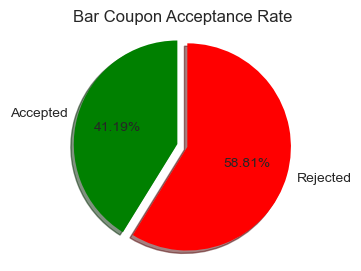



Comparison with Overall Acceptance
Overall acceptance rate: 56.93%
Bar coupon acceptance rate: 41.19%
Difference: -15.74% points


In [54]:
# 2.1:Investigating the Bar Coupons - Calculate the proportion of accepted bar coupons

accepted_bar_count = bar_coupons_df['Y'].sum()
proportion_bar = bar_coupons_df['Y'].mean()
total_bar_count = len(bar_coupons_df)
acceptance_bar_rate = accepted_bar_count / total_bar_count

# Display the results
print(f"Total bar coupons: {total_bar_count}")
print(f"Accepted bar coupons: {accepted_bar_count}")
print(f"Rejected: {total_bar_count - accepted_bar_count}")
print(f"Proportion of bar coupons accepted: {acceptance_bar_rate:.4f} ({acceptance_bar_rate*100:.2f}%)")

# Create a pie chart to visualize
print("\n\n")
labels = ['Accepted', 'Rejected']
sizes = [accepted_bar_count, total_bar_count - accepted_bar_count]
colors = ['green', 'red']
explode = (0.1, 0)  # explode the 1st slice (Accepted)

plt.figure(figsize=(4, 3))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Bar Coupon Acceptance Rate')
plt.show()

print(f"\n\n{styles.BOLD}Comparison with Overall Acceptance{styles.END}")
overall_coupon_rate = data_clean_df['Y'].mean() * 100
bar_coupon_rate = proportion_bar * 100
print(f"Overall acceptance rate: {overall_coupon_rate:.2f}%")
print(f"Bar coupon acceptance rate: {bar_coupon_rate:.2f}%")
print(f"Difference: {bar_coupon_rate - overall_coupon_rate:.2f}% points")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Bar Visit Unique Values
Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

Bar Visit Group counts:
bar_frequent_visitor
3 or fewer times     1720
More than 3 times     193
Name: count, dtype: int64

Bar Coupon Acceptance Rate by Visit Frequency:
                      count  sum  acceptance_rate
bar_frequent_visitor                             
3 or fewer times       1720  641         0.372674
More than 3 times       193  147         0.761658

Acceptance rates:
3 or fewer times: 0.3727 (37.27%)
More than 3 times: 0.7617 (76.17%)

Difference in acceptance rates (More - Fewer): 0.3890 (38.90 percentage points)


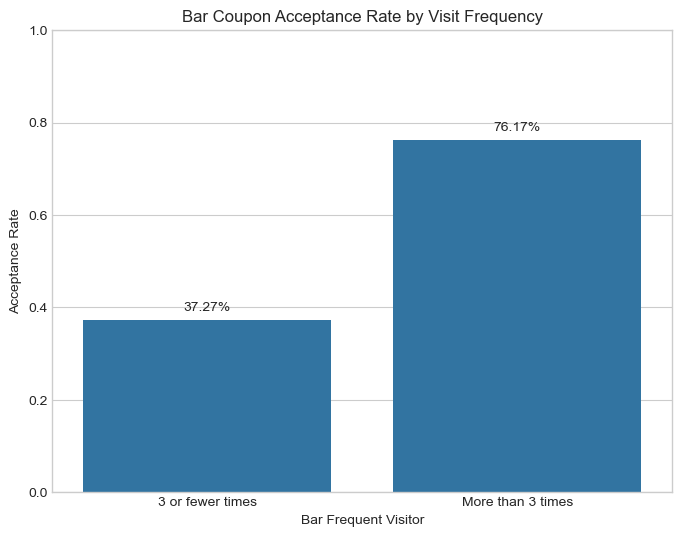

In [55]:
# 3.1:Investigating the Bar Coupons - Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more

print(f"{styles.BOLD}Bar Visit Unique Values{styles.END}")
print(bar_coupons_df['Bar'].value_counts())

# Define the low and high frequency"
bar_visit_low_frequency = ['never', 'less1', '1~3']
bar_visit_high_frequency = ['4~8', 'gt8']

# Adjust the column name as needed for your dataset
bar_coupons_df['bar_frequent_visitor'] = bar_coupons_df['Bar'].apply(
    lambda x: '3 or fewer times' if x in bar_visit_low_frequency else 'More than 3 times'
)

print(f"\n{styles.BOLD}Bar Visit Group counts:{styles.END}")
print(bar_coupons_df['bar_frequent_visitor'].value_counts())
    
# Calculate acceptance rates for each group
acceptance_by_frequency = bar_coupons_df.groupby('bar_frequent_visitor')['Y'].agg(['count', 'sum'])
acceptance_by_frequency['acceptance_rate'] = acceptance_by_frequency['sum'] / acceptance_by_frequency['count']

# Display the results
print(f"\n{styles.BOLD}Bar Coupon Acceptance Rate by Visit Frequency:{styles.END}")
print(acceptance_by_frequency)

print(f"\n{styles.BOLD}Acceptance rates:{styles.END}")
for idx, row in acceptance_by_frequency.iterrows():
    print(f"{idx}: {row['acceptance_rate']:.4f} ({row['acceptance_rate']*100:.2f}%)")

# Calculate the difference in acceptance rates
if '3 or fewer times' in acceptance_by_frequency.index and 'More than 3 times' in acceptance_by_frequency.index:
    rate_less = acceptance_by_frequency.loc['3 or fewer times', 'acceptance_rate']
    rate_more = acceptance_by_frequency.loc['More than 3 times', 'acceptance_rate']
    difference = rate_more - rate_less
    print(f"\nDifference in acceptance rates (More - Fewer): {difference:.4f} ({difference*100:.2f} percentage points)")



plt.figure(figsize=(8, 6))
sns.barplot(x=acceptance_by_frequency.index, y=acceptance_by_frequency['acceptance_rate'])
plt.title('Bar Coupon Acceptance Rate by Visit Frequency')
plt.xlabel('Bar Frequent Visitor')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis from 0 to 1 for better visualization
for i, rate in enumerate(acceptance_by_frequency['acceptance_rate']):
    plt.text(i, rate + 0.02, f'{rate:.2%}', ha='center')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Bar Visit Unique Values
Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

Age Unique Values:
age
21         397
26         368
31         324
36         196
41         171
46         103
50plus     273
below21     81
Name: count, dtype: int64

Bar Coupon Acceptance Rate Comparison:
                          count  sum  acceptance_rate
target_group                                         
Bar > 1/month & Age > 25    403  278         0.689826
Others                     1510  510         0.337748

Acceptance rates:
Bar > 1/month & Age > 25: 0.6898 (68.98%)
Others: 0.3377 (33.77%)

Difference in acceptance rates (Target group - Others): 0.3521 (35.21% points)

Is the difference?
Yes, drivers over 25 who go to bars more than once per month are 35.21% points more likely to accept.





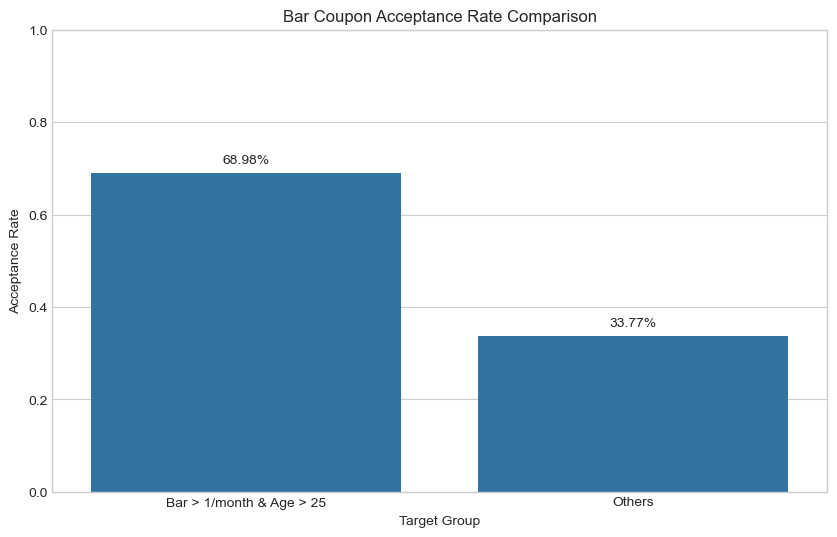

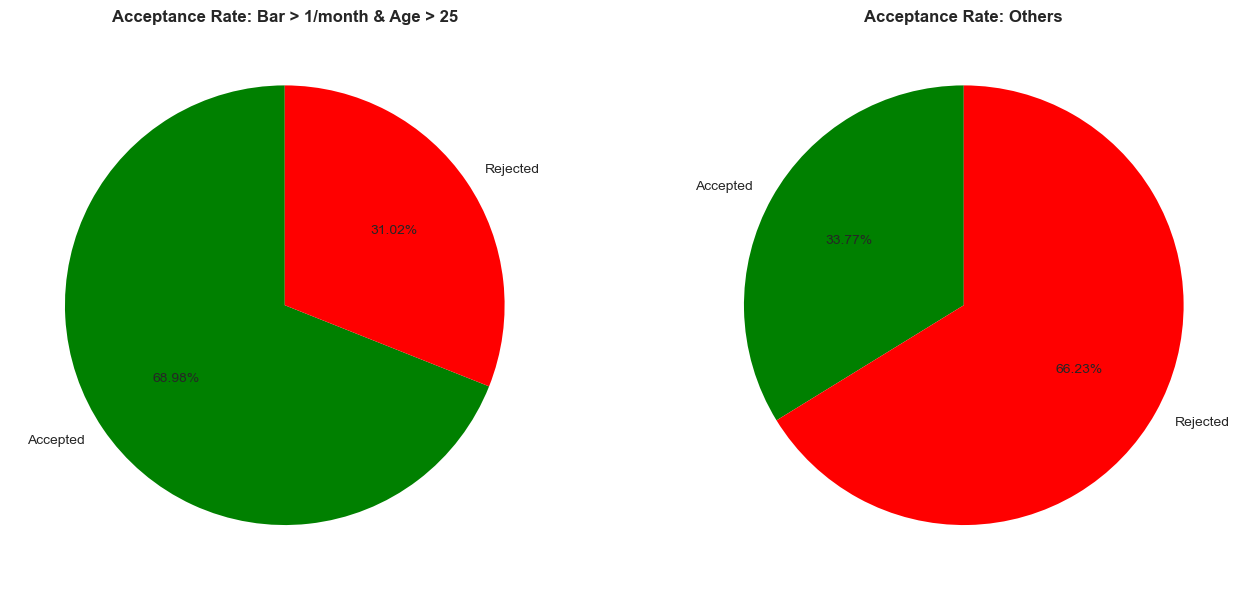

In [56]:
# 4.1:Investigating the Bar Coupons - Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others

print(f"{styles.BOLD}Bar Visit Unique Values{styles.END}")
print(bar_coupons_df['Bar'].value_counts())

print(f"\n{styles.BOLD}Age Unique Values:{styles.END}")
print(bar_coupons_df['age'].value_counts().sort_index())

# More than once a month Bar Visit
more_than_once_bar_visit = ['1~3', '4~8', 'gt8']

# Age Over 25
age_over_25 = ['26', '31', '36', '41', '46', '50plus']

# Create a new column to identify the target group
bar_coupons_df['target_group'] = ((bar_coupons_df['Bar'].isin(more_than_once_bar_visit)) & 
                                 (bar_coupons_df['age'].isin(age_over_25))).map({True: 'Bar > 1/month & Age > 25', 
                                                                   False: 'Others'})

# Calculate acceptance rates for each group
group_stats = bar_coupons_df.groupby('target_group')['Y'].agg(['count', 'sum'])
group_stats['acceptance_rate'] = group_stats['sum'] / group_stats['count']

# Display the results
print(f"{styles.BOLD}\nBar Coupon Acceptance Rate Comparison:{styles.END}")
print(group_stats)

print(f"{styles.BOLD}\nAcceptance rates:{styles.END}")
for idx, row in group_stats.iterrows():
    print(f"{idx}: {row['acceptance_rate']:.4f} ({row['acceptance_rate']*100:.2f}%)")

# Calculate the difference in acceptance rates
if len(group_stats) == 2:
    target_rate = group_stats.loc['Bar > 1/month & Age > 25', 'acceptance_rate']
    others_rate = group_stats.loc['Others', 'acceptance_rate']
    difference = target_rate - others_rate
    print(f"{styles.BOLD}\nDifference in acceptance rates (Target group - Others):{styles.END} {difference:.4f} ({difference*100:.2f}% points)")

    print(f"{styles.BOLD}\nIs the difference?{styles.END}")
    print(f"Yes, drivers over 25 who go to bars more than once per month are {difference*100:.2f}% points more likely to accept.")

print("\n\n")
plt.figure(figsize=(10, 6))
sns.barplot(x=group_stats.index, y=group_stats['acceptance_rate'])
plt.title('Bar Coupon Acceptance Rate Comparison')
plt.xlabel('Target Group')
plt.ylabel('Acceptance Rate') 
plt.ylim(0, 1)  # Set y-axis from 0 to 1 for better visualization
for i, rate in enumerate(group_stats['acceptance_rate']):
    plt.text(i, rate + 0.02, f'{rate:.2%}', ha='center')
plt.show()

print("\n\n")

# Create a pie chart for each group to visualize acceptance vs rejection
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, group in enumerate(group_stats.index):
    group_data = bar_coupons_df[bar_coupons_df['target_group'] == group]
    accepted = group_data['Y'].sum()
    rejected = len(group_data) - accepted
    
    axes[i].pie([accepted, rejected], 
                labels=['Accepted', 'Rejected'],
                autopct='%1.2f%%',
                colors=['green', 'red'],
                startangle=90)
    axes[i].set_title(f'Acceptance Rate: {group}', fontweight="bold")

plt.tight_layout()
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Bar Visit Unique Values
Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

Passenger Visit Unique Values
passenger
Alone        1141
Friend(s)     318
Partner       260
Kid(s)        194
Name: count, dtype: int64

Occupation Visit Unique Values
occupation
Unemployed                                   292
Student                                      237
Computer & Mathematical                      225
Sales & Related                              175
Education&Training&Library                   125
Management                                   108
Office & Administrative Support              101
Arts Design Entertainment Sports & Media      88
Business & Financial                          82
Retired                                       71
Healthcare Support                            44
Food Preparation & Serving Related            43
Community & Social Services                   40
Healthcare Practitioners & Technical          36
Transportatio

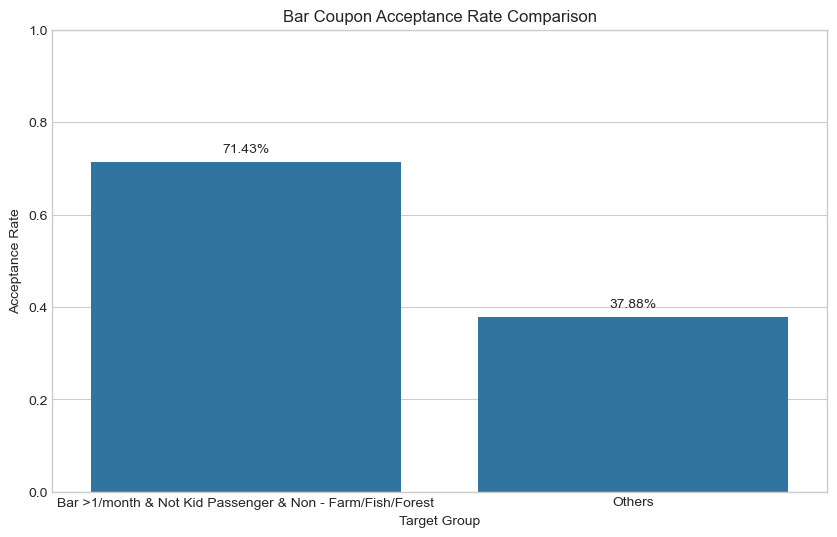

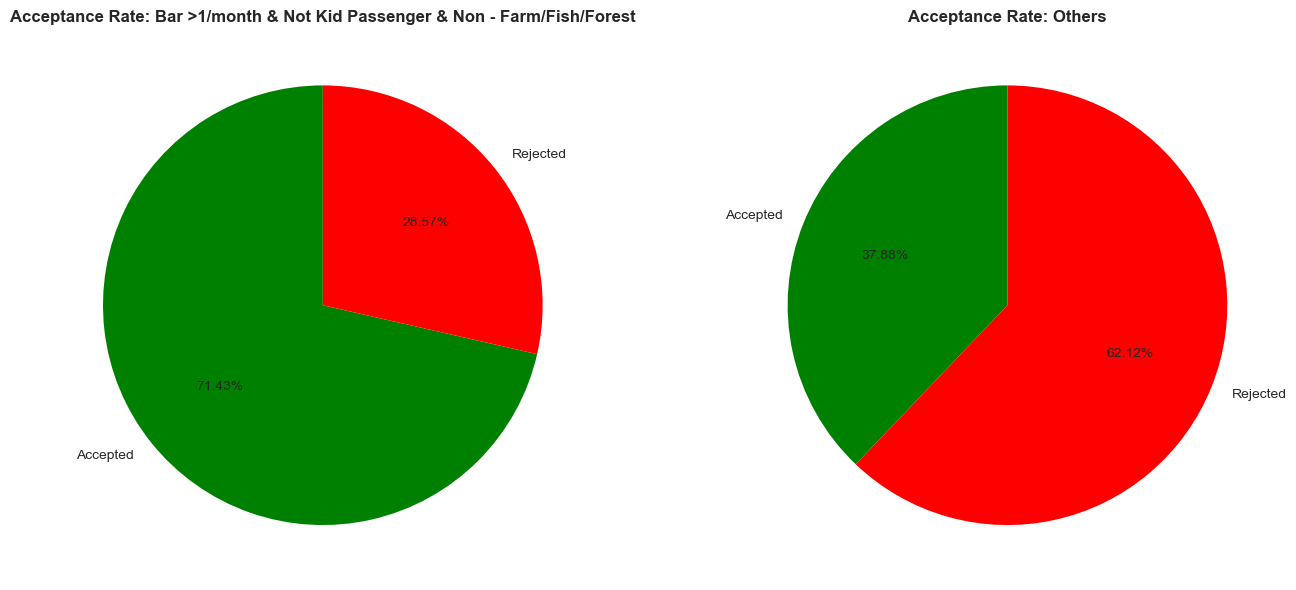

In [57]:
# 5.1:Investigating the Bar Coupons - Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry

print(f"{styles.BOLD}Bar Visit Unique Values{styles.END}")
print(bar_coupons_df['Bar'].value_counts())

print(f"{styles.BOLD}\nPassenger Visit Unique Values{styles.END}")
print(bar_coupons_df['passenger'].value_counts())

print(f"{styles.BOLD}\nOccupation Visit Unique Values{styles.END}")
print(bar_coupons_df['occupation'].value_counts())

# More than once a month Bar Visit
more_than_once_bar_visit = ['1~3', '4~8', 'gt8']

# Had passengers that were not a kid
passengers_with_driver_but_not_kid = ['Friend(s)', 'Partner']

# Create a new column to identify the target group
bar_coupons_df['target_group'] = (
    (bar_coupons_df['Bar'].isin(more_than_once_bar_visit)) & 
    (bar_coupons_df['passenger'].isin(passengers_with_driver_but_not_kid)) &
    (bar_coupons_df['occupation'] != 'Farming Fishing & Forestry')
).map({True: 'Bar >1/month & Not Kid Passenger & Non - Farm/Fish/Forest', False: 'Others'})

# Calculate acceptance rates for each group
group_stats = bar_coupons_df.groupby('target_group')['Y'].agg(['count', 'sum'])
group_stats['acceptance_rate'] = group_stats['sum'] / group_stats['count']

# Display the results
print(f"{styles.BOLD}\nBar Coupon Acceptance Rate Comparison:{styles.END}")
print(group_stats)
print(f"{styles.BOLD}\nAcceptance rates:{styles.END}")
for idx, row in group_stats.iterrows():
    print(f"{idx}: {row['acceptance_rate']:.4f} ({row['acceptance_rate']*100:.2f}%)")

# Calculate the difference in acceptance rates
if len(group_stats) == 2:
    target_rate = group_stats.loc['Bar >1/month & Not Kid Passenger & Non - Farm/Fish/Forest', 'acceptance_rate']
    others_rate = group_stats.loc['Others', 'acceptance_rate']
    difference = target_rate - others_rate
    print(f"\n{styles.BOLD}Difference in acceptance rates (Target group - Others):{styles.END} {difference:.4f} ({difference*100:.2f}% points)")
    
    print(f"{styles.BOLD}\nIs the difference?{styles.END}")
    print(f"Yes by {difference*100:.2f}%")

print("\n\n")
plt.figure(figsize=(10, 6))
sns.barplot(x=group_stats.index, y=group_stats['acceptance_rate'])
plt.title('Bar Coupon Acceptance Rate Comparison')
plt.xlabel('Target Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis from 0 to 1 for better visualization
for i, rate in enumerate(group_stats['acceptance_rate']):
    plt.text(i, rate + 0.02, f'{rate:.2%}', ha='center')
plt.show()

#Create a pie chart for each group to visualize acceptance vs rejection
print("\n\n")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, group in enumerate(group_stats.index):
    group_data = bar_coupons_df[bar_coupons_df['target_group'] == group]
    accepted = group_data['Y'].sum()
    rejected = len(group_data) - accepted
    
    axes[i].pie([accepted, rejected], 
                labels=['Accepted', 'Rejected'],
                autopct='%1.2f%%',
                colors=['green', 'red'],
                startangle=90)
    axes[i].set_title(f'Acceptance Rate: {group}', fontweight="bold")

plt.tight_layout()
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Bar Visit Unique Values
Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

Passenger Visit Unique Values
passenger
Alone        1141
Friend(s)     318
Partner       260
Kid(s)        194
Name: count, dtype: int64

Marital Status Visit Unique Values
maritalStatus
Married partner      833
Single               638
Unmarried partner    352
Divorced              73
Widowed               17
Name: count, dtype: int64

Income Visit Unique Values
income
$25000 - $37499     300
$100000 or More     282
$12500 - $24999     271
$50000 - $62499     249
$37500 - $49999     247
Less than $12500    159
$75000 - $87499     143
$87500 - $99999     133
$62500 - $74999     129
Name: count, dtype: int64

Restaurant Visit for < $20 Value Unique Values
RestaurantLessThan20
1~3      839
4~8      548
less1    312
gt8      186
never     28
Name: count, dtype: int64

Age Unique Values
age
21         397
26         368
31         324
50plus     273
36         196
41    

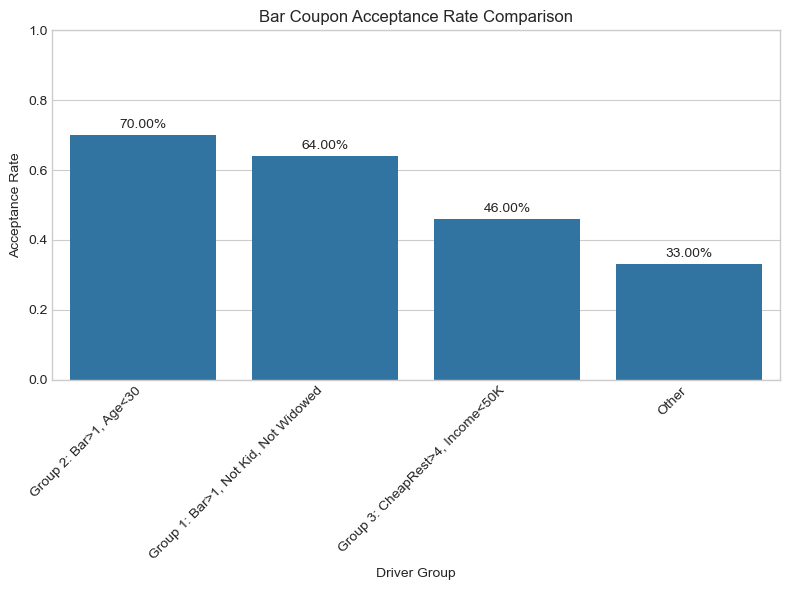

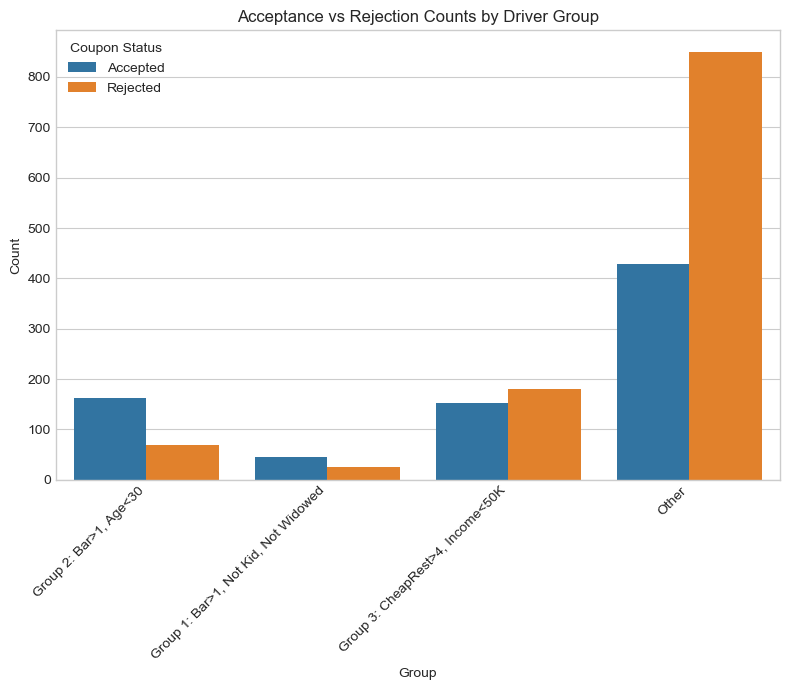

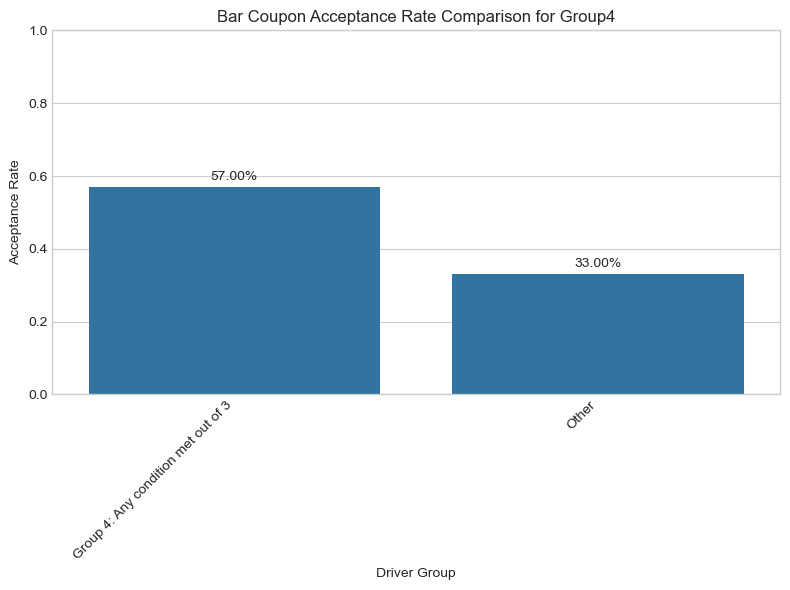

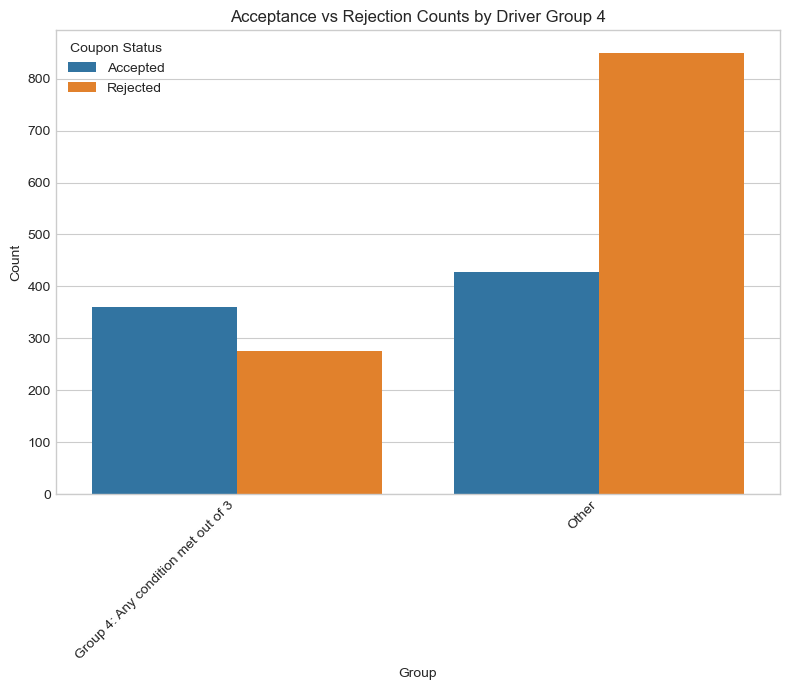

In [58]:
# 6.1:Investigating the Bar Coupons

print(f"{styles.BOLD}Bar Visit Unique Values{styles.END}")
print(bar_coupons_df['Bar'].value_counts())

print(f"{styles.BOLD}\nPassenger Visit Unique Values{styles.END}")
print(bar_coupons_df['passenger'].value_counts())

print(f"{styles.BOLD}\nMarital Status Visit Unique Values{styles.END}")
print(bar_coupons_df['maritalStatus'].value_counts())

print(f"{styles.BOLD}\nIncome Visit Unique Values{styles.END}")
print(bar_coupons_df['income'].value_counts())

print(f"{styles.BOLD}\nRestaurant Visit for < $20 Value Unique Values{styles.END}")
print(bar_coupons_df['RestaurantLessThan20'].value_counts())

print(f"{styles.BOLD}\nAge Unique Values{styles.END}")
print(bar_coupons_df['age'].value_counts())

# More than once a month Bar Visit
more_than_once_bar_visit = ['1~3', '4~8', 'gt8']

# Had passengers that were not a kid
passengers_with_driver_but_not_kid = ['Friend(s)', 'Partner']

# Not Widowed
marital_status_not_widowed = ['Single', 'Married partner', 'Unmarried partner', 'Divorced']

# Under 30
age_under_30 = ['below21', '21', '26']

# Cheap restaurants visit more than 4 times a month
cheap_restaurants_visit_more_than_4 = ['4~8', 'gt8']

# Income less than 50K
income_less_than_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

# Create a new column to identify the three groups
# Group 1: Go to bars > once a month, passengers not kids, not widowed
condition1 = (bar_coupons_df['Bar'].isin(more_than_once_bar_visit)) & (bar_coupons_df['passenger'].isin(passengers_with_driver_but_not_kid)) & (bar_coupons_df['maritalStatus'].isin(marital_status_not_widowed))

# Group 2: Go to bars > once a month and age < 30
condition2 = (bar_coupons_df['Bar'].isin(more_than_once_bar_visit)) & (bar_coupons_df['age'].isin(age_under_30))

# Group 3: Go to cheap restaurants > 4 times a month and income < 50K
condition3 = (bar_coupons_df['RestaurantLessThan20'].isin(cheap_restaurants_visit_more_than_4)) & (bar_coupons_df['income'].isin(income_less_than_50k))

# Group 4: Any condition met from condition1 or condition2 or condition3
condition4 = (condition1 | condition2 | condition3)

# Create a new column with the group labels
bar_coupons_df['driver_group'] = 'Other'
bar_coupons_df.loc[condition1, 'driver_group'] = 'Group 1: Bar>1, Not Kid, Not Widowed'
bar_coupons_df.loc[condition2, 'driver_group'] = 'Group 2: Bar>1, Age<30'
bar_coupons_df.loc[condition3, 'driver_group'] = 'Group 3: CheapRest>4, Income<50K'

# Create a new column with the group labels
bar_coupons_df['driver_group_any_condition'] = 'Other'
bar_coupons_df.loc[condition4, 'driver_group_any_condition'] = 'Group 4: Any condition met out of 3'

# Calculate acceptance rates for each group
group_stats = bar_coupons_df.groupby('driver_group')['Y'].agg(['count', 'sum', 'mean'])
group_stats.columns = ['Total', 'Accepted', 'Acceptance_Rate']
group_stats['Acceptance_Rate'] = group_stats['Acceptance_Rate'].round(2)
group_stats['Acceptance_Rate_%'] = (group_stats['Acceptance_Rate'] * 100).round(2)
# Sort by acceptance rate for better visualization
group_stats = group_stats.sort_values('Acceptance_Rate', ascending=False)
print(f"\n{styles.BOLD}Bar Coupon Acceptance Rate Comparison:{styles.END}")
print(group_stats)

# Calculate acceptance rates for Group4
group4_stats = bar_coupons_df.groupby('driver_group_any_condition')['Y'].agg(['count', 'sum', 'mean'])
group4_stats.columns = ['Total', 'Accepted', 'Acceptance_Rate']
group4_stats['Acceptance_Rate'] = group4_stats['Acceptance_Rate'].round(2)
group4_stats['Acceptance_Rate_%'] = (group4_stats['Acceptance_Rate'] * 100).round(2)
# Sort by group4 acceptance rate for better visualization
group4_stats = group4_stats.sort_values('Acceptance_Rate', ascending=False)
print(f"\n{styles.BOLD}Bar Coupon Acceptance Rate Comparison for Group4:{styles.END}")
print(group4_stats)

print("\n\n")

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=group_stats.index, y=group_stats['Acceptance_Rate'])
plt.title('Bar Coupon Acceptance Rate Comparison')
plt.xlabel('Driver Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis from 0 to 1 for better visualization
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add acceptance rate labels on top of bars
for i, rate in enumerate(group_stats['Acceptance_Rate']):
    ax.text(i, rate + 0.02, f'{rate:.2%}', ha='center')

plt.show()

print("\n\n")

# Create a grouped bar chart showing accepted vs rejected for each group
plt.figure(figsize=(8, 7))
acceptance_data = pd.DataFrame({
   'Group': group_stats.index.repeat(2),
   'Status': ['Accepted', 'Rejected'] * len(group_stats),
   'Count': [
        value
        for _, row in group_stats.iterrows()
        for value in (row['Accepted'], row['Total'] - row['Accepted'])
    ]
})

sns.barplot(x='Group', y='Count', hue='Status', data=acceptance_data)
plt.title('Acceptance vs Rejection Counts by Driver Group')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Coupon Status')
plt.tight_layout()
plt.show()

############################
# Plot for Group4
############################
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=group4_stats.index, y=group4_stats['Acceptance_Rate'])
plt.title('Bar Coupon Acceptance Rate Comparison for Group4')
plt.xlabel('Driver Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis from 0 to 1 for better visualization
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add acceptance rate labels on top of bars
for i, rate in enumerate(group4_stats['Acceptance_Rate']):
    ax.text(i, rate + 0.02, f'{rate:.2%}', ha='center')

plt.show()

print("\n\n")

# Create a grouped bar chart showing accepted vs rejected for each group
plt.figure(figsize=(8, 7))
acceptance_data_group4 = pd.DataFrame({
    'Group': group4_stats.index.repeat(2),
    'Status': ['Accepted', 'Rejected'] * len(group4_stats),
    'Count': [
        value
        for _, row in group4_stats.iterrows()
        for value in (row['Accepted'], row['Total'] - row['Accepted'])
    ]
})

sns.barplot(x='Group', y='Count', hue='Status', data=acceptance_data_group4)
plt.title('Acceptance vs Rejection Counts by Driver Group 4')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Coupon Status')
plt.tight_layout()
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [59]:
# 7.1:Investigating the Bar Coupons - Hypothesize about drivers who accepted the bar coupons?
print(f"{styles.BOLD}\nHypothesis about drivers who accepted the coupons{styles.END}")

print("""
Based on the observations, drivers who accept bar coupons are likely to be:

1. Driver who visits Bar frequently
2. Driver who is not driving alone and not having kids as passenegrs. 
   As Bars aren't kid-friendly place.
3. Driver who is between 21-30 years of age 
4. Drivers who has Friends/Partner as passengers, it is expected for requent 
   Bar visitors as it is social place to go with friends/partner   
5. Driver who is not in occupation of Farming/Fishing/Forestry
6. Drive who is widowed (Not having Life Partner) is less likely to accept

The data shows that drivers with established bar-going habits are 2–3× more 
likely to accept, indicating that the coupon amplifies existing behavior 
rather than creating new behavior.
Therefore, bar coupons should be sent more frequently to drivers who:
 * Visit bars regularly (at least more than once per month),
 * Fall within the 21–30 age demographic,
 * Are traveling with friends or a partner, and
 * Do not have children as passengers.
""")


Hypothesis about drivers who accepted the coupons

Based on the observations, drivers who accept bar coupons are likely to be:

1. Driver who visits Bar frequently
2. Driver who is not driving alone and not having kids as passenegrs. 
   As Bars aren't kid-friendly place.
3. Driver who is between 21-30 years of age 
4. Drivers who has Friends/Partner as passengers, it is expected for requent 
   Bar visitors as it is social place to go with friends/partner   
5. Driver who is not in occupation of Farming/Fishing/Forestry
6. Drive who is widowed (Not having Life Partner) is less likely to accept

The data shows that drivers with established bar-going habits are 2–3× more 
likely to accept, indicating that the coupon amplifies existing behavior 
rather than creating new behavior.
Therefore, bar coupons should be sent more frequently to drivers who:
 * Visit bars regularly (at least more than once per month),
 * Fall within the 21–30 age demographic,
 * Are traveling with friends or a pa

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [60]:
print(f"{styles.BOLD}\nAcceptance Rate for Coupon Type{styles.END}")

coupon_summary = data_clean_df.groupby('coupon')['Y'].agg(['sum', 'count', 'mean'])
coupon_summary.columns = ['Accepted', 'Total', 'Acceptance_Rate']
coupon_summary['Acceptance_Rate'] = (coupon_summary['Acceptance_Rate']).round(2)
coupon_summary['Acceptance_Rate_%'] = (coupon_summary['Acceptance_Rate'] * 100).round(2)
coupon_summary = coupon_summary.sort_values('Acceptance_Rate', ascending=False)
print(coupon_summary)

print("""
Let’s analyze Coffee House to understand what factors drive the choice of Coffee House.
""")


Acceptance Rate for Coupon Type
                       Accepted  Total  Acceptance_Rate  Acceptance_Rate_%
coupon                                                                    
Carry out & Take away      1682   2280             0.74               74.0
Restaurant(<20)            1881   2653             0.71               71.0
Coffee House               1894   3816             0.50               50.0
Restaurant(20-50)           632   1417             0.45               45.0
Bar                         788   1913             0.41               41.0

Let’s analyze Coffee House to understand what factors drive the choice of Coffee House.



In [61]:
# Create DataFrame for Carry out & Take away and Restaurant(<20) coupons
print(f"{styles.BOLD}\nDataFrame for Coffee House coupons{styles.END}")

coffee_coupons_df = data_clean_df[data_clean_df['coupon'] == 'Coffee House'].copy()

print(f"Original Dataset rows: {len(data_clean_df)}")
print(f"Coffee House coupon rows: {len(coffee_coupons_df)}")
print(f"Percentage of total: {len(coffee_coupons_df) / len(data_clean_df) * 100:.2f}%")

coffee_coupons_df.head()


DataFrame for Coffee House coupons
Original Dataset rows: 12079
Coffee House coupon rows: 3816
Percentage of total: 31.59%


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [62]:
# What proportion of coffee house coupons were accepted?
print(f"{styles.BOLD}\nCoffee House Coupon Acceptance Rate{styles.END}")

total_coffee = len(coffee_coupons_df)
accepted_coffee = coffee_coupons_df['Y'].sum()
proportion_coffee = coffee_coupons_df['Y'].mean()
coffee_rate = proportion_coffee * 100

print(f"Total coffee house coupons: {total_coffee}")
print(f"Accepted: {accepted_coffee}")
print(f"Rejected: {total_coffee - accepted_coffee}")
print(f"Proportion accepted: {proportion_coffee:.4f}")
print(f"Percentage accepted: {coffee_rate:.2f}%")


Coffee House Coupon Acceptance Rate
Total coffee house coupons: 3816
Accepted: 1894
Rejected: 1922
Proportion accepted: 0.4963
Percentage accepted: 49.63%



Passenger Visit Unique Values
passenger
Alone        2157
Friend(s)    1175
Partner       291
Kid(s)        193
Name: count, dtype: int64

Age Unique Values
age
21         844
26         797
31         587
50plus     529
36         382
41         317
46         217
below21    143
Name: count, dtype: int64

Coupon Acceptance Rate Comparison:
         Total  Accepted  Acceptance_Rate  Acceptance_Rate_%
age                                                         
below21    143        97             0.68               68.0
21         844       437             0.52               52.0
46         217       110             0.51               51.0
26         797       409             0.51               51.0
41         317       156             0.49               49.0
31         587       284             0.48               48.0
36         382       179             0.47               47.0
50plus     529       222             0.42               42.0





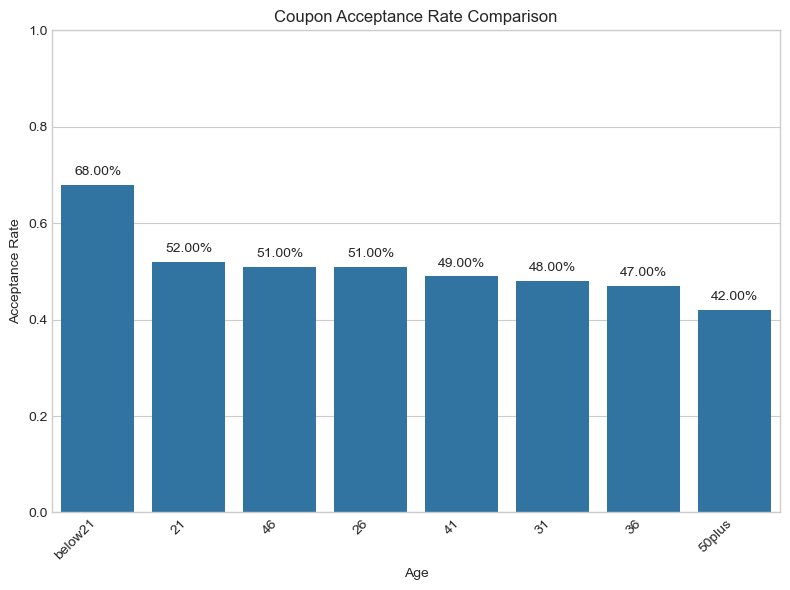

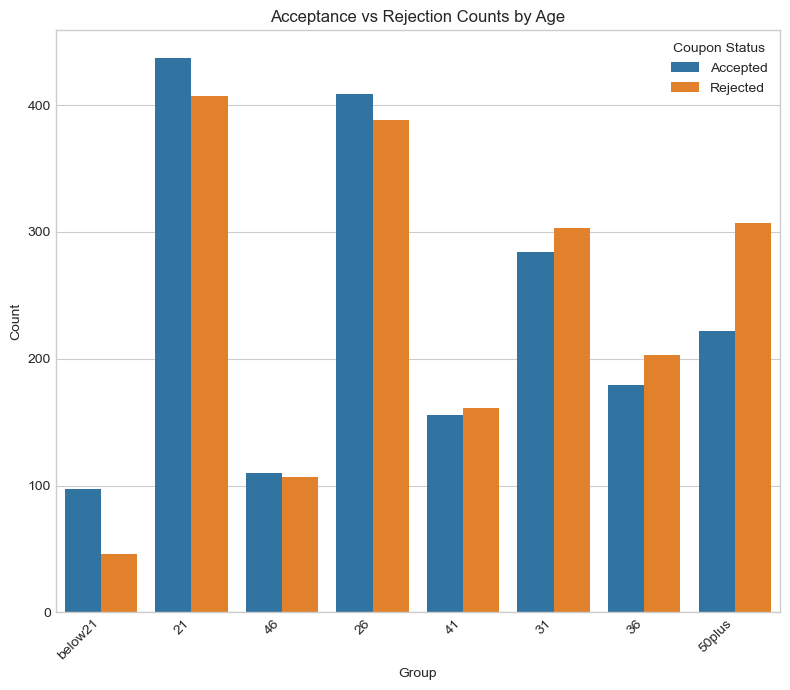

In [63]:
# Analyze acceptance rate by Age
print(f"{styles.BOLD}\nPassenger Visit Unique Values{styles.END}")
print(coffee_coupons_df['passenger'].value_counts())

print(f"{styles.BOLD}\nAge Unique Values{styles.END}")
print(coffee_coupons_df['age'].value_counts())

# Calculate acceptance rates for each group
group_stats = coffee_coupons_df.groupby(['age'])['Y'].agg(['count', 'sum', 'mean'])
group_stats.columns = ['Total', 'Accepted', 'Acceptance_Rate']
group_stats['Acceptance_Rate'] = group_stats['Acceptance_Rate'].round(2)
group_stats['Acceptance_Rate_%'] = (group_stats['Acceptance_Rate'] * 100).round(2)
# Sort by acceptance rate for better visualization
group_stats = group_stats.sort_values('Acceptance_Rate', ascending=False)
print(f"\n{styles.BOLD}Coupon Acceptance Rate Comparison:{styles.END}")
print(group_stats)

print("\n\n")

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=group_stats.index, y=group_stats['Acceptance_Rate'])
plt.title('Coupon Acceptance Rate Comparison')
plt.xlabel('Age')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis from 0 to 1 for better visualization
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add acceptance rate labels on top of bars
for i, rate in enumerate(group_stats['Acceptance_Rate']):
    ax.text(i, rate + 0.02, f'{rate:.2%}', ha='center')

plt.show()

print("\n\n")

# Create a grouped chart showing accepted vs rejected for each group
plt.figure(figsize=(8, 7))
acceptance_data = pd.DataFrame({
   'Group': group_stats.index.repeat(2),
   'Status': ['Accepted', 'Rejected'] * len(group_stats),
   'Count': [
        value
        for _, row in group_stats.iterrows()
        for value in (row['Accepted'], row['Total'] - row['Accepted'])
    ]
})

ax1 = sns.barplot(x='Group', y='Count', hue='Status', data=acceptance_data)
plt.title('Acceptance vs Rejection Counts by Age')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Coupon Status')
plt.tight_layout()
plt.show()

In [64]:
print("""
Above chart clearly shows that number of coupons are less for below 21 age group but 
their acceptance rate is higher.

Now lets check analysis based on time.
""")


Above chart clearly shows that number of coupons are less for below 21 age group but 
their acceptance rate is higher.

Now lets check analysis based on time.




Coffee House coupon acceptance rate by time of the day
      Accepted  Total  Acceptance_Rate  Acceptance_Rate_% age
time                                                         
10AM       544    857             0.63               63.0  21
2PM        414    759             0.55               55.0  21
7AM        385    875             0.44               44.0  21
10PM       121    282             0.43               43.0  21
6PM        430   1043             0.41               41.0  26





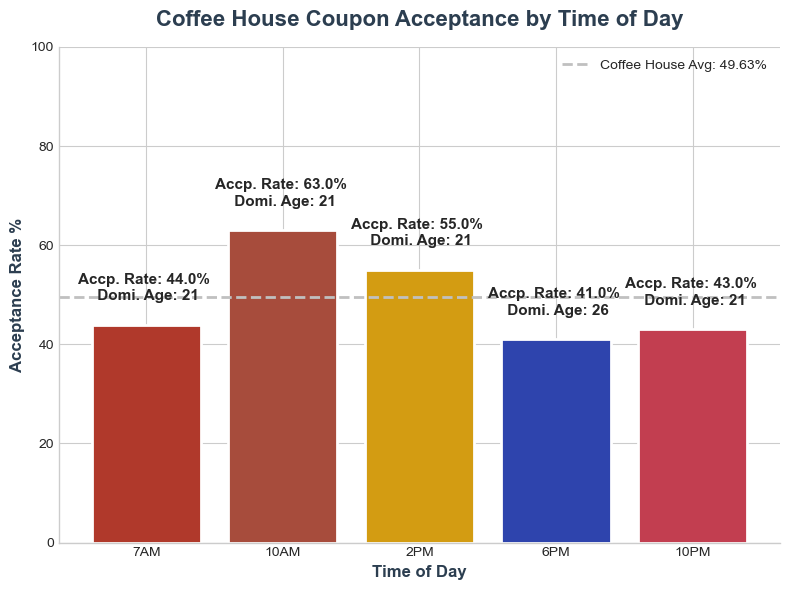

In [65]:
# Analyze acceptance rate by time
print(f"{styles.BOLD}\nCoffee House coupon acceptance rate by time of the day{styles.END}")

time_stats = coffee_coupons_df.groupby('time')['Y'].agg(['sum', 'count', 'mean'])
time_stats.columns = ['Accepted', 'Total', 'Acceptance_Rate']
time_stats['Acceptance_Rate'] = (time_stats['Acceptance_Rate']).round(2)
time_stats['Acceptance_Rate_%'] = (time_stats['Acceptance_Rate'] * 100).round(2)
time_stats = time_stats.sort_values('Acceptance_Rate', ascending=False)

# Count occurrences of age_group per time
age_group_counts = (coffee_coupons_df.groupby(['time', 'age']).size().reset_index(name='count'))

# Get dominant age group per time
max_age_group_per_time = (age_group_counts.loc[age_group_counts.groupby('time')['count'].idxmax()].set_index('time'))

# Join dominant age group
time_stats = time_stats.join(max_age_group_per_time[['age']])
print(time_stats)

print("\n\n")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))

# Sort by time order for logical display
time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']
time_data = time_stats.reindex(time_order)

colors = ['#B0392B', '#A74C3C', '#D39C12', '#2E44AD', '#C23E50']
bars = ax.bar(time_data.index, time_data['Acceptance_Rate_%'], 
              color=colors, edgecolor='white', linewidth=2)

ax.set_title('Coffee House Coupon Acceptance by Time of Day', 
             fontsize=16, fontweight='bold', color='#2C3E50', pad=15)
ax.set_xlabel('Time of Day', fontsize=12, fontweight='bold', color='#2C3E50')
ax.set_ylabel('Acceptance Rate %', fontsize=12, fontweight='bold', color='#2C3E50')
ax.set_ylim(0, 100)

# Add percentage labels
for bar, rate, age in zip(bars, time_data['Acceptance_Rate_%'], time_data['age']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'Accp. Rate: {rate}% \n Domi. Age: {age}', ha='center', fontweight='bold', fontsize=11)

# Add overall coffee rate reference line
ax.axhline(y=coffee_rate, color='#C0C0C0', linestyle='--', linewidth=2, 
           label=f'Coffee House Avg: {coffee_rate:.2f}%')
ax.legend(fontsize=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [66]:
print("""
Above data shows clearly Dominant Age is 21 and best time to offer a coupon for Coffee House is from 10 am - 2 pm.
""")


Above data shows clearly Dominant Age is 21 and best time to offer a coupon for Coffee House is from 10 am - 2 pm.

